# Carte mondiale

Exemple

## Importer les librairies nécessaires

Pour créer votre carte, vous aurez besoin des librairies suivantes :

-   `geovizir` pour récupérer les données statistiques et géographiques
-   `pandas` pour la mise en classe des données
-   `matplotlib.pyplot` pour créer la carte

In [1]:
import geovizir as gvz
import pandas as pd
import matplotlib.pyplot as plt

## Récupérer les données

Une fois que vous avez choisi l’indicateur qui vous intéresse, vous
pouvez le récupérer avec la fonction `get_data()` de `geovizir`. Pour
récupérer les données, vous devez spécifier le code de l’indicateur et
l’année souhaitée.

In [8]:
tfra = gvz.get_data('SP.ADO.TFRT', 2023)

En plus des données statistiques, vous aurez également besoin des
données géographiques pour créer la carte. Pour cela, vous pouvez
utiliser la fonction `ne_countries()` de `geovizir`.

In [9]:
world = gvz.ne_countries()
world = world.to_crs('ESRI:54030')

## Fusionner les données

Une fois que vous avez récupéré les données statistiques et
géographiques, vous devez les fusionner pour créer la carte. Pour cela,
vous réalisez une jointure entre les deux tableaux en utilisant la
colonne `iso3c` du tableau statistique et la colonne `ADM0_A3` du
tableau geographique comme clé de jointure.

In [10]:
plot_data = world.merge(tfra, how='left', left_on='ADM0_A3', right_on='iso3c')

## Mise en classe

Avant de créér la carte, vous devez mettre en classe les données
statistiques. Pour cela, vous utiliser une des fonctions `cut()` ou
`qcut()` de `pandas` pour diviser les données en classes. Choisissez le
nombre de classes que vous souhaitez créer et la méthode de mise en
classe la plus indiquée en fonction de la distribution de vos données.

La fonction `relabel_bins()` de `geovizir` vous permet de renommer les
classes créées pour qu’elles soient plus lisibles sur la carte.

In [11]:
plot_data['value_cat'] = pd.qcut(plot_data['value'], 5)
plot_data['value_cat'] = gvz.relabel_bins(plot_data['value_cat'])

## Création de la carte

Une fois que vous avez mis en classe les données, vous pouvez créer la
carte avec la fonction `plot()` de `matplotlib.pyplot`. Vous pouvez
personnaliser la carte en ajoutant des titres, des légendes et d’autres
éléments graphiques pour la rendre plus informative et attrayante.

Choisissez une palette de couleurs qui correspond à votre indicateur et
qui est facilement lisible. Une liste des palettes est disponible dans
la [documentation de
`matplotlib`](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

Les palette de couleurs `viridis`, `plasma`, `inferno`, `magma` et
`cividis` sont recommandées pour les cartes, car elles sont
perceptuellement uniformes et conviennent à la plupart des types de
données. Vous pouvez inverser la palette de couleurs en ajoutant `_r` à
la fin du nom de la palette (par exemple, `viridis_r`).

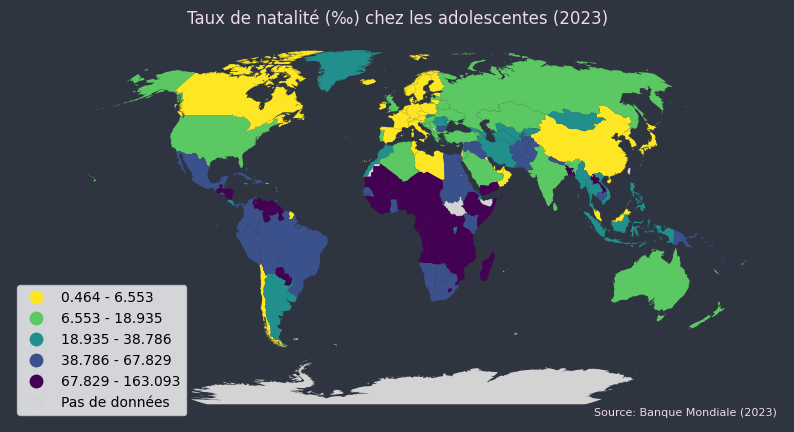

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_facecolor('#2e3440') # Couleur de fond de la carte
fig.patch.set_facecolor('#2e3440')  # Couleur de fond de l'image

map = plot_data.plot(
  column="value_cat", legend=True,
  # Choix de la palette de couleurs
  cmap='viridis_r',
  ax=ax,
  figsize=(10, 6),
  missing_kwds={
    # Couleur utilisée pour les pays sans données
    'color': 'lightgray',
    # Légende pour les pays sans données
    'label': 'Pas de données'
  },
  legend_kwds={
    # Emplacement de la légende
    # Utilisez 'upper' ou 'lower' pour placer la légende en haut ou en bas
    # et 'left' ou 'right' pour la placer à gauche ou à droite
    'loc': 'lower left',
    # Pour un placement plus précis de la légende
    # vous pouvez utiliser bbox_to_anchor avec un paramètre x et y
    #'bbox_to_anchor': (0.3, 0.4)
  })

# Retirer les axes de coordonnées
map.set_axis_off()

# Ajouter un titre
map.set_title("Taux de natalité (‰) chez les adolescentes (2023)", color='#eddaeb')

# Ajouter la source des données en bas à droite de la carte
plt.text(
  0.99, 0.01,
  # Texte à afficher
  'Source: Banque Mondiale (2023)',
  ha='right', va='bottom',
  transform=map.transAxes, 
  fontsize=8,
  # Couleur du texte
  color='#eddaeb'
)
map